**This notebook is in continuation of another [notebook](https://jovian.ai/iamchiragsharma/07-urban-8k-assignment). If you haven't gone through the previous notebook it will be fine as this is also a standalone notebook but if you are a beginner I do recommend going through the previous notebook first.**

In [5]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the variables
data_dir = os.getenv('DATA_DIR')
data_dir

'/Users/max/proj/audioClassify/data'

# Urban 8k Audio Classification Project

## Dataset Description
This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music. The classes are drawn from the urban sound taxonomy. For a detailed description of the dataset and how it was compiled please refer to our paper.
All excerpts are taken from field recordings uploaded to www.freesound.org. The files are pre-sorted into ten folds (folders named fold1-fold10) to help in the reproduction of and comparison with the automatic classification results reported in the article above.

In addition to the sound excerpts, a CSV file containing metadata about each excerpt is also provided.

**8732 audio files of urban sounds (see description above) in WAV format. The sampling rate, bit depth, and number of channels are the same as those of the original file uploaded to Freesound (and hence may vary from file to file).**

## Task Description
The Dataset contains 10 classes, we will do classification task on the audio file obtained.
```
A numeric identifier of the sound class:
0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music
```



## How to get the Urban8K Dataset?
Just go to [Urban8K Website](https://urbansounddataset.weebly.com/urbansound8k.html) and fill a simple form to download the dataset. Since the dataset is > 5GB in compressed form itself, it's better to copy the download link and directly !wget it to the colab and move to the drive for further use.

### Check for Urban8K Dataset Availability

The code below checks if the Urban8K dataset is available in the data directory. If not found, you can use the provided download script to get the dataset.

**To download the dataset using the script:**
1. Navigate to the data directory: `cd /path/to/your/project/data`
2. Run the download script: `./download_urban_sounds.sh`
3. The script will download and extract the dataset automatically

In [6]:
%cd $data_dir
# Check if the Urban8K dataset exists in the data directory
import os
urban8k_path = os.path.join(data_dir, "UrbanSound8K")

if os.path.exists(urban8k_path):
    print(f"✓ Urban8K dataset found at: {urban8k_path}")
    print(f"Audio directory: {os.path.join(urban8k_path, 'audio')}")
    print(f"Metadata directory: {os.path.join(urban8k_path, 'metadata')}")
else:
    print(f"❌ Urban8K dataset not found at: {urban8k_path}")
    print("\nTo download the dataset, run the download script:")
    print(f"cd {data_dir}")
    print("./download_urban_sounds.sh")
    print("\nOr download manually from: https://urbansounddataset.weebly.com/urbansound8k.html")

/Users/max/proj/audioClassify/data
❌ Urban8K dataset not found at: /Users/max/proj/audioClassify/data/UrbanSound8K

To download the dataset, run the download script:
cd /Users/max/proj/audioClassify/data
./download_urban_sounds.sh

Or download manually from: https://urbansounddataset.weebly.com/urbansound8k.html


### Dataset Setup Complete

Once the Urban8K dataset is downloaded and extracted using the script, the notebook will automatically use the data from your local data directory through the `DATA_DIR` environment variable.

The dataset should be structured as:
```
data/
├── UrbanSound8K/
│   ├── audio/
│   │   ├── fold1/
│   │   ├── fold2/
│   │   └── ... (fold10)
│   └── metadata/
│       └── UrbanSound8K.csv
└── download_urban_sounds.sh
```

## Data Analysis, Exploration and Visualizations

### Some Information About Dataset.
This dataset has audio belonging to 10 classes, unlike images Audio data is different, it's similar in some senses but there are certain differences which are unique to audio data.

Before even using audio file dataset, the first challenge in itself is that audio files are continous data and our computers can only store discrete data, so in what way we digitize it such that we can easily store.

Apparently the solution is that we figure out a way that is discrete yet continous. Sounds misleading but what we do is we instead of storing continous value, we just sample it at fixed durations like 0.2 second apart or less or more. We just sample it and the rate at which it is sampled is known as **Sampling rate**.

<figure>
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/23210623/sound.png" width="350" alt="my img"/>
  <figcaption> Image Courtesy Analytics Vidhya </figcaption>
</figure>

When we say we sample it, what are we actually doing?
> We are recording the amplitude at that point.


* So the audio data is nothing just the amplitude stored at regular intervals which mimic the original continous wave.

* We take and store thousands of measurements per second. If we can take tons of measurements extremely quickly with enough possible amplitude values, we can effectively use these snapshots to reconstruct the resolution and complexity of an analog wave.


<figure>
  <img src="https://www.izotope.com/en/learn/digital-audio-basics-sample-rate-and-bit-depth/_jcr_content/root/sectioncontainer_main/flexcontainer/flexcontainer_center/flexcontainer_center_top/image_1558274996.coreimg.82.1280.jpeg/1590799241393/reconstructing-the-original-signal.jpeg
" width= "500" alt="my img"/>
  <figcaption> Image Courtesy izotope </figcaption>
</figure>

* [Read more about the audio concepts involved such as bit depth and nyquist rate](https://www.izotope.com/en/learn/digital-audio-basics-sample-rate-and-bit-depth.html)


In [ ]:
import IPython.display as ipd #Allows Audio files to be played directly in the notebook
import librosa #library we will to analyze sounds
import librosa.display #library module which helps visualize the waves

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### Reading audio files

In [ ]:
audios = glob.glob(os.path.join(data_dir, "UrbanSound8K/audio/*/*.wav"), recursive=True)

print(f"Total Audio Files : {len(audios)}")

Total Audio Files : 8732


In [ ]:
audios[:5] #Contains path of all audios

['/content/UrbanSound8K/audio/fold1/78360-4-0-21.wav',
 '/content/UrbanSound8K/audio/fold1/106905-8-0-3.wav',
 '/content/UrbanSound8K/audio/fold1/176787-5-0-26.wav',
 '/content/UrbanSound8K/audio/fold1/103258-5-0-19.wav',
 '/content/UrbanSound8K/audio/fold1/43786-3-0-0.wav']

### Hit the play icon below and listen to the sound, try to remember the sound and the plot generated do it several times and try to pick up pattern yourself.

To read audio files, we will be using,

```python
data, sample_rate = librosa.load(audio_path)
```

librosa by default reads the audio file at sr(sampling rate) = 22050, if you want your custom sampling here you can pass sr = your_rate in the librosa.load function 

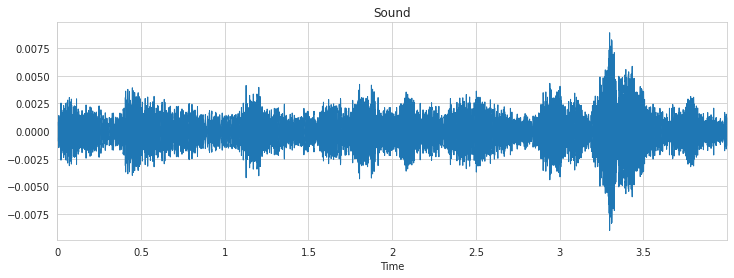

In [ ]:
plt.figure(figsize=(12,4))

play_audio = random.choice(audios)
data, sample_rate = librosa.load(play_audio)
librosa.display.waveplot(data)
plt.title("Sound")
ipd.Audio(play_audio)

#### **If you managed to pick up patterns, you can see it becomes a visual problem as well. Just a thought.**

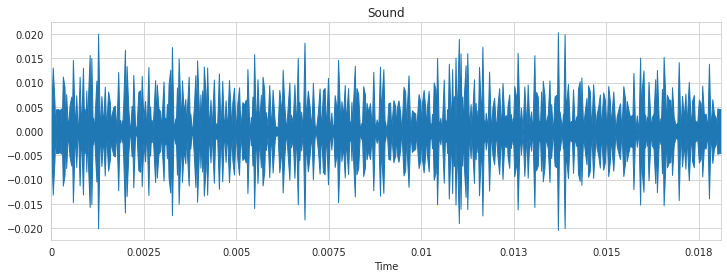

In [ ]:
plt.figure(figsize=(12,4))
play_audio = random.choice(audios)
data, sample_rate = librosa.load(play_audio, sr=100)
librosa.display.waveplot(data)
plt.title("Sound")
ipd.Audio(play_audio)

### Plotting same audio at different sampling rate

Higher the sampling rate, higher the crisp of plot because less error while trying to recreate original audio with higher number of samples and vice versa.

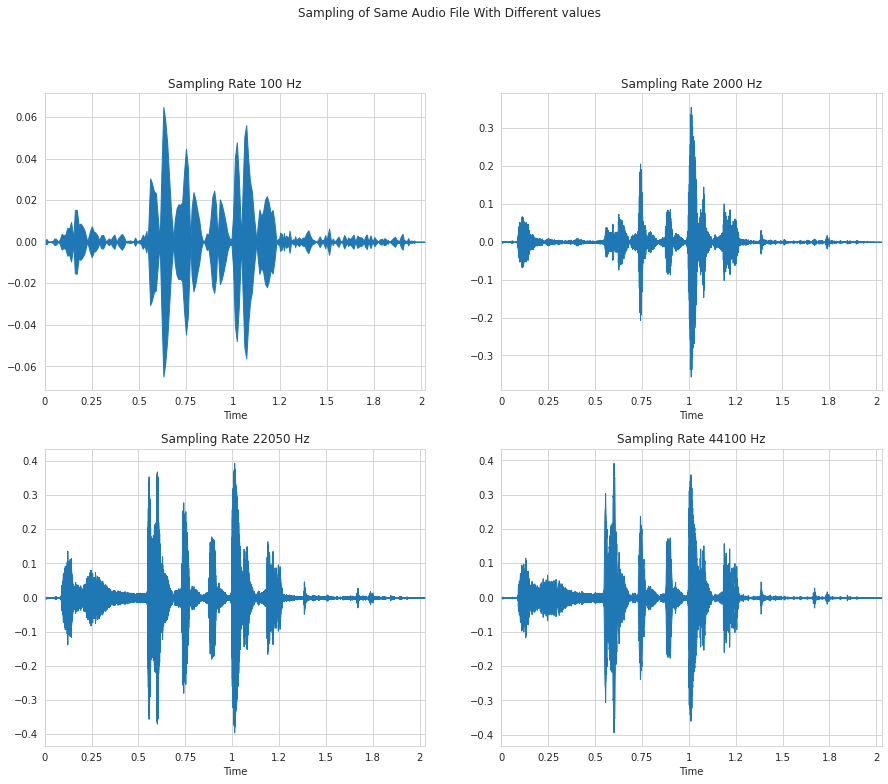

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,12))
fig.suptitle("Sampling of Same Audio File With Different values")
axs = np.reshape(axs,-1)
play_audio = random.choice(audios)
srs = [100, 2000, 22050, 44100]
for ax,sr in zip(axs,srs):
  try:
    data, sample_rate = librosa.load(play_audio, sr=sr)
    librosa.display.waveplot(data, sr=sample_rate, ax=ax)
    ax.set_title(f"Sampling Rate {sr} Hz")
  except:
    print("Run Again Some Unknown Error")

ipd.Audio(play_audio)

### Reading Metadata for the dataset

In [ ]:
metadata = pd.read_csv(os.path.join(data_dir, "UrbanSound8K/metadata/UrbanSound8K.csv"))

metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


#### Anatomy of Metadata csv
* UrbanSound8K the main dataset directory contains a two folders audio and metadata, the audio is where all the audio files are located, if you are running this in colab on right if you click on the UrbanSound8K Folder you can see that it has the said two folders by clicking on it.
* audio folder in itself contains 10 folders named fold1, fold2 ..... fold10. These folds contains audio files details of which are mentioned in above csv or dataframe.

* If we join "UrbanSound8K/audio/" + "fold" + fold_value(1/2/...10) + slice_file_name it becomes path for the audio file as well.(This logic will be implemented later, keep it in mind till then.)

#### Selecting random row for each class in metadata

In [ ]:
unique_audios = metadata.groupby(['class']).apply(lambda sub_df : sub_df.sample()).reset_index(drop = True)

In [ ]:
unique_audios

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,119067-0-0-1.wav,119067,0.500000,4.500000,1,10,0,air_conditioner
1,199769-1-0-9.wav,199769,5.348273,9.348273,1,3,1,car_horn
2,162318-2-0-39.wav,162318,19.500000,23.500000,1,5,2,children_playing
3,52740-3-0-0.wav,52740,68.097690,72.097690,2,9,3,dog_bark
4,180125-4-1-7.wav,180125,44.348486,48.348486,1,5,4,drilling
5,195451-5-0-18.wav,195451,11.249062,15.249062,1,3,5,engine_idling
6,46656-6-5-0.wav,46656,10.761675,12.112513,1,1,6,gun_shot
7,62837-7-1-28.wav,62837,275.706708,279.706708,1,3,7,jackhammer
8,24347-8-0-81.wav,24347,44.620371,48.620371,2,4,8,siren
9,42955-9-0-12.wav,42955,6.000000,10.000000,1,6,9,street_music


#### Plotting selected rows

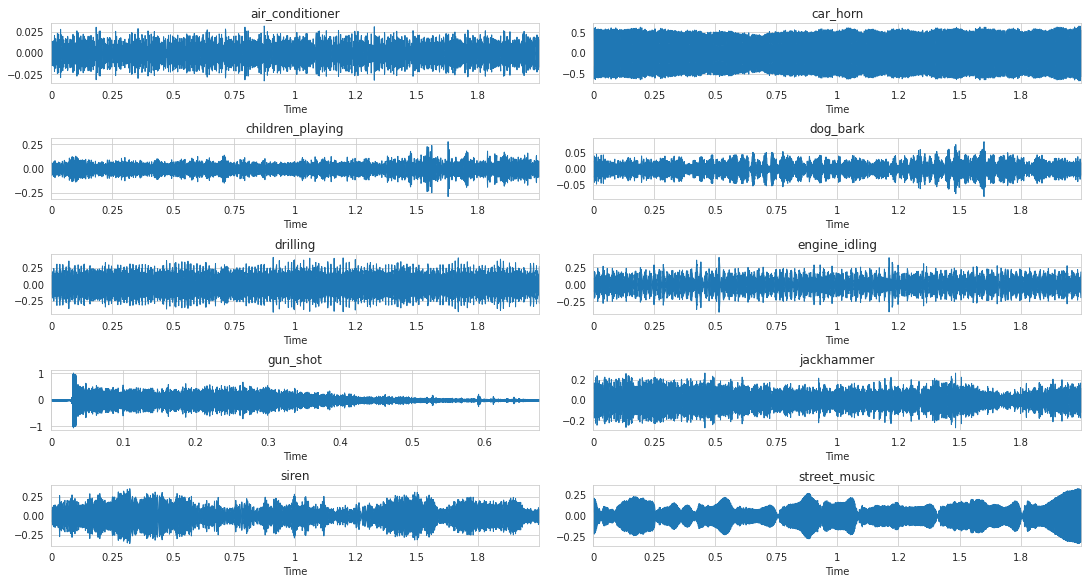

In [ ]:
fig, axs = plt.subplots(5,2,figsize=(15,8),constrained_layout=True)
axs = np.reshape(axs, -1)

for (index,row),ax in zip(unique_audios.iterrows(),axs):
  ax.set_title(row.values[-1])
  data, sr = librosa.load(os.path.join(data_dir, f"UrbanSound8K/audio/fold{row.values[-3]}/", row.values[0]))
  _ = librosa.display.waveplot(data, sr=sample_rate, ax=ax)

## MFCC Feature Extractor : Different from previous notebook's MFCC as it doesn't take mean, it directly returns the features.

In [ ]:
def extract_features(file_name, n_mfcc=40):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
    return mfccs

### Reading audios again, so we don't have to scroll up again.

In [ ]:
audios = glob.glob(os.path.join(data_dir, "UrbanSound8K/audio/*/*.wav"), recursive=True)

print(f"Total Audio Files : {len(audios)}")

Total Audio Files : 8732


### Extracting Features and Shapes for further analysis.

In [ ]:
from collections import Counter
from tqdm.notebook import tqdm

extract_features_shape = []
extract_features_values = []

for audio_file in tqdm(audios):
  features = extract_features(audio_file)
  extract_features_values.append(features)
  extract_features_shape.append(features.shape)

In [ ]:
unique_shapes = set(extract_features_shape)
list(unique_shapes)[:4]

[(40, 3), (40, 88), (40, 173), (40, 22)]

### Since the shape of features vary widely, CNN won't work directly, we have to pade them all to constant length i.e to max length.

In [ ]:
max_dim = sorted(list(unique_shapes), key=lambda shape : shape[1]) #Sorting unique shape list on basis of their second component(along the row)
max_len = max_dim[-1][1]

## Standardizing Length of the Dataset

* Our MFCC Features are 2D, we mentioned the number of mfcc in the previous function ```extract_features```. We will have all mfcc in shape of (40, n) where n can be any positive integer. For m feature_arrays the dimensions look like (m,40,n). Where n varies for each array.

* We will pad the sequences such that the final dimension of the feature_arrays become (m,40,max(n for n of all arrays). Let's say max_len is the maximum_length along the row for features. The final dimensions are (m,40,max_len) all padded by zero to match the max_len.

In [ ]:
def padded_sequence(feature_values, max_len = None):
  if max_len is None:
    print("Fix Max Length First")
    return None

  feature_len = feature_values.shape[1]
  pad_dim = ((0,0), (0, max_len - feature_len))
  return np.pad(feature_values, pad_dim)

In [ ]:
padded_features = list(map(lambda features : padded_sequence(features, max_len), extract_features_values))

* Mapping audios to their respective MFCC features in form of a dict.

In [ ]:
audio_2_features = dict(zip(audios, padded_features))

# Data Mapping

In [ ]:
metadata = pd.read_csv(os.path.join(data_dir, "UrbanSound8K/metadata/UrbanSound8K.csv"))

metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


* Adding ```file_path``` column which equals to ```base_path``` + ```fold``` + ```slice_file_name```.
* ```file_path``` is the complete relative path that can be used to read files directly.

In [ ]:
base_path = os.path.join(data_dir, "UrbanSound8K/audio")
metadata['file_path'] = metadata.apply(lambda row : os.path.join(*[base_path, f"fold{row['fold']}", row['slice_file_name']]), axis=1)

* Creating new column ```features``` which is ```file_path``` mapped to **MFCC Features** extracted before.

In [ ]:
metadata['features'] = metadata['file_path'].map(audio_2_features)

metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class,file_path,features
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,/content/UrbanSound8K/audio/fold5/100032-3-0-0...,"[[-306.772569323401, -177.59208535704371, -99...."
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,"[[-457.69536206989505, -451.0248088536722, -45..."
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,"[[-468.03671021239467, -467.4226560550245, -48..."
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,"[[-422.4221469201535, -411.9085176553704, -409..."
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,/content/UrbanSound8K/audio/fold5/100263-2-0-1...,"[[-438.1016202414386, -434.47786480748454, -44..."


* Let's save this metadata to the data directory for future use.

In [ ]:
import os

# Assuming 'data_dir' is defined earlier in your code
# Save metadata with features to data directory
metadata_path = os.path.join(data_dir, "metadata_features.json")
metadata.to_json(metadata_path, orient='records')
print(f"Metadata saved to: {metadata_path}")